In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv
/kaggle/input/undata-country-profiles/country_profile_variables.csv
/kaggle/input/undata-country-profiles/kiva_country_profile_variables.csv


# > COVID-19 Vaccine South America Exploratory Data Analysis
This Project shows an exploratory data analysis of the Covid-19 vaccine dataset. The analysis is divided in 3 parts:
1. First is a Worldwide analysis
2. Second is South America Analysis
3. Third we will use UN data to find correlations and see if there are any relationship between United Nations data and the vaccination's speed

> **First Part**
Cleaning and Analyze the Data

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing dataset and a brief summary
df = pd.read_csv('../input/covid-world-vaccination-progress/country_vaccinations.csv')
df.head()

                 

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              2418 non-null   object 
 1   iso_code                             2189 non-null   object 
 2   date                                 2418 non-null   object 
 3   total_vaccinations                   1575 non-null   float64
 4   people_vaccinated                    1303 non-null   float64
 5   people_fully_vaccinated              756 non-null    float64
 6   daily_vaccinations_raw               1288 non-null   float64
 7   daily_vaccinations                   2321 non-null   float64
 8   total_vaccinations_per_hundred       1575 non-null   float64
 9   people_vaccinated_per_hundred        1303 non-null   float64
 10  people_fully_vaccinated_per_hundred  756 non-null    float64
 11  daily_vaccinations_per_million

In [5]:
#Chaging the Nan value
df.fillna(0,inplace = True)

### Vaccines - Country  Strategy
Note: If a country uses more than one vaccine, the graph will show  both vaccines in  one bar

<AxesSubplot:xlabel='vaccines'>

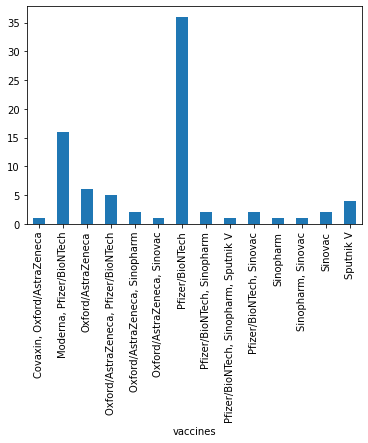

In [6]:
df_vaccines = df.drop_duplicates(subset=['country','vaccines'], keep ='last')
vacinas_dictionary = dict(df_vaccines.groupby('vaccines')['country'].count())
df_vaccines.groupby('vaccines')['country'].count().plot(kind='bar')


### Countries that most vaccinated

<AxesSubplot:ylabel='country'>

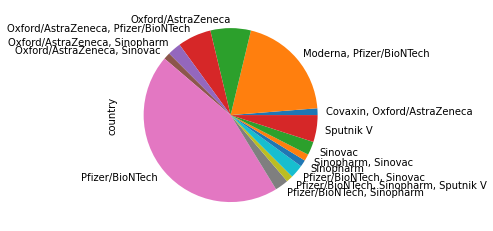

In [7]:
df_vaccines.groupby('vaccines')['country'].count().plot(kind='pie')

Text(0.5, 0, 'Countries')

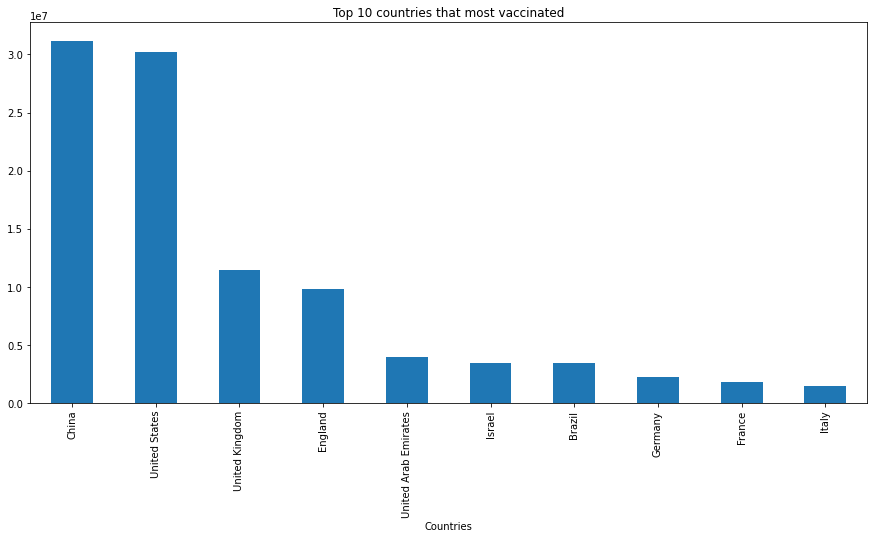

In [8]:
fig,ax = plt.subplots(figsize=(15,7))
df.groupby(['country']).max()['people_vaccinated'].nlargest(10).plot.bar()
plt.title('Top 10 countries that most vaccinated')
plt.xlabel('Countries')

### Countries that most vaccinated per hundred 

Text(0.5, 0, 'Countries')

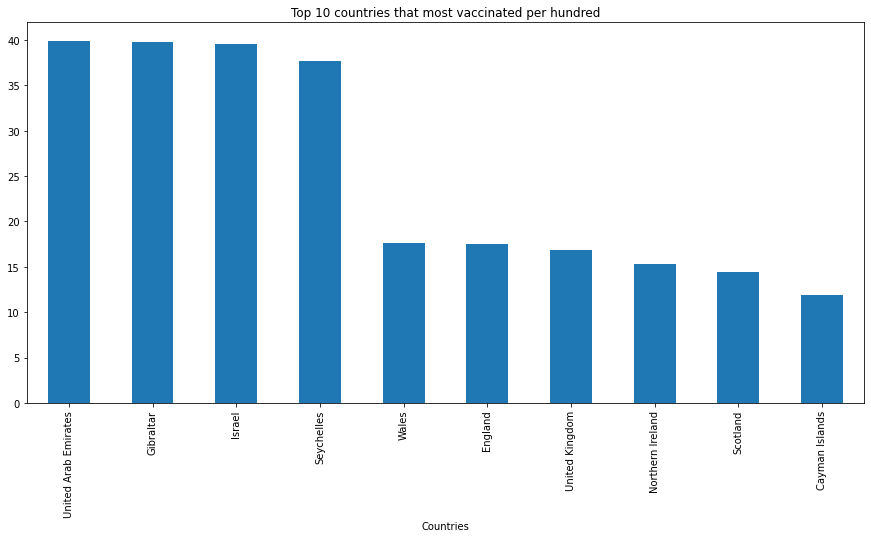

In [9]:
fig,ax = plt.subplots(figsize=(15,7))
df.groupby(['country']).max()['people_vaccinated_per_hundred'].nlargest(10).plot.bar()
plt.title('Top 10 countries that most vaccinated per hundred')
plt.xlabel('Countries')

Looking  the graphs, Althoug USA and China has vaccinated more people that the other countrie, those populations are too big and they haven't vaccinated soo much citizens. Gibraltar and Israel vaccinated almost 40% of their population

## South America Dataset
Now we wil investigate the speed of vaccination in South America 

In [10]:
#South America Dataset
countries_sa = ['Brazil','Argentina','Chile','Venezuela','Bolivia','Colombia','Ecuador','Peru','Paraguay','Uruguay','Suriname','Guyana'] 
south_america_ds = df[df.country.isin(countries_sa)]
south_america_ds

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
10,Argentina,ARG,2020-12-29,700.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
11,Argentina,ARG,2020-12-30,0.0,0.0,0.0,0.0,15656.0,0.00,0.00,0.0,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
12,Argentina,ARG,2020-12-31,32013.0,0.0,0.0,0.0,15656.0,0.07,0.00,0.0,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
13,Argentina,ARG,2021-01-01,0.0,0.0,0.0,0.0,11070.0,0.00,0.00,0.0,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
14,Argentina,ARG,2021-01-02,0.0,0.0,0.0,0.0,8776.0,0.00,0.00,0.0,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Ecuador,ECU,2021-01-31,0.0,0.0,0.0,0.0,472.0,0.00,0.00,0.0,27.0,Pfizer/BioNTech,Government of Ecuador,https://drive.google.com/file/d/1HRz845fa451ZH...
646,Ecuador,ECU,2021-02-01,0.0,0.0,0.0,0.0,470.0,0.00,0.00,0.0,27.0,Pfizer/BioNTech,Government of Ecuador,https://drive.google.com/file/d/1HRz845fa451ZH...
647,Ecuador,ECU,2021-02-02,0.0,0.0,0.0,0.0,468.0,0.00,0.00,0.0,27.0,Pfizer/BioNTech,Government of Ecuador,https://drive.google.com/file/d/1HRz845fa451ZH...
648,Ecuador,ECU,2021-02-03,0.0,0.0,0.0,0.0,466.0,0.00,0.00,0.0,26.0,Pfizer/BioNTech,Government of Ecuador,https://drive.google.com/file/d/1HRz845fa451ZH...


### Looking for  total vaccination and total vaccination per hundred in the last day when data was collected

In [11]:
#Finding which country vacinated more pepole
south_america_ds.groupby('country').total_vaccinations.max()

country
Argentina     471383.0
Bolivia         3560.0
Brazil       3401383.0
Chile         605644.0
Ecuador         6228.0
Name: total_vaccinations, dtype: float64

In [12]:
#People vaccinated per hundre
south_america_ds.groupby('country').people_vaccinated_per_hundred.max()

country
Argentina    0.68
Bolivia      0.00
Brazil       1.60
Chile        3.10
Ecuador      0.04
Name: people_vaccinated_per_hundred, dtype: float64

### Evolution of People Vaccinated and people Vaccinated per hundred in South America

Text(0.5, 0, 'Date')

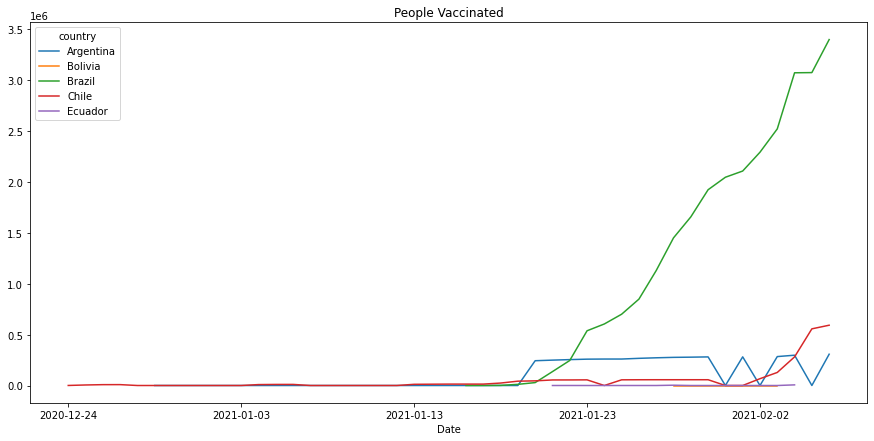

In [13]:
fig,ax = plt.subplots(figsize=(15,7))
south_america_ds.groupby(['date','country']).sum()['people_vaccinated'].unstack().plot(ax=ax)
plt.title('People Vaccinated')
plt.xlabel('Date')


Text(0.5, 0, 'Date')

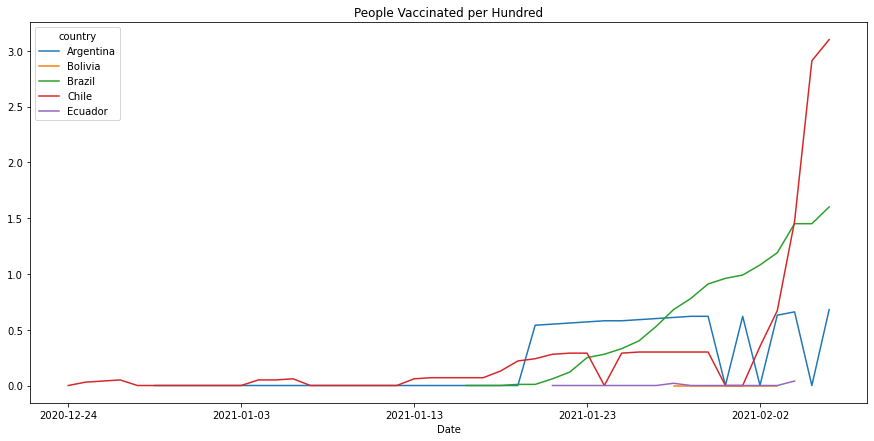

In [14]:
fig,ax = plt.subplots(figsize=(15,7))
south_america_ds.groupby(['date','country']).sum()['people_vaccinated_per_hundred'].unstack().plot(ax=ax)
plt.title('People Vaccinated per Hundred')
plt.xlabel('Date')


## Comparing vaccination speed with United Nations Data

In this part we will compare tha data of vaccination with some basic data about the countries. There is some relationship between countries GDP and vaccination's speed? And Health expenditure?

In [15]:
#Adding Undataset
undt = pd.read_csv('../input/undata-country-profiles/country_profile_variables.csv')
undt.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [16]:
#Creating the UN datasey with South america countries
saundt = undt[undt.country.isin(countries_sa)]
saundt

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
8,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,...,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99
28,Brazil,SouthAmerica,8515767,209288,25.0,96.6,1772591,-3.8,8528.3,5.2,...,59.1,990,59.2,529.8/2.6,10948,61,100.0/87.0,88.0/51.5,0.06,-99
42,Chile,SouthAmerica,756102,18055,24.3,98.2,240796,2.3,13416.2,3.9,...,64.3,197,23.4,82.6/4.7,540,85,99.7/93.3,100.0/90.9,0.02,-99
46,Colombia,SouthAmerica,1141748,49066,44.2,96.8,292080,3.1,6056.1,6.8,...,55.9,835,52.8,84.1/1.8,5380,31,96.8/73.8,85.2/67.9,0.47,-99
61,Ecuador,SouthAmerica,257217,16625,66.9,99.9,100177,0.2,6205.1,10.1,...,48.9,2358,50.8,43.9/2.8,1247,42,93.4/75.5,87.0/80.7,0.31,-99
89,Guyana,SouthAmerica,214969,778,4.0,101.9,3282,3.1,4278.8,17.6,...,38.2,94,84.0,2.0/2.6,7,46,98.2/98.3,87.9/82.0,0.97,-99
157,Paraguay,SouthAmerica,406752,6811,17.1,102.9,27714,3.1,4174.4,19.0,...,44.4,59,39.4,5.7/0.9,325,38,100.0/94.9,95.5/78.4,0.22,-99
158,Peru,SouthAmerica,1285216,32166,25.1,99.8,190428,3.3,6069.1,7.6,...,40.9,685,57.9,61.7/2.0,1020,30,91.4/69.2,82.5/53.2,0.18,-99
194,Suriname,SouthAmerica,163820,563,3.6,100.7,4879,-2.7,8985.3,11.4,...,42.8,83,98.3,2.0/3.7,44,62,98.1/88.4,88.4/61.4,0.32,-99
219,Uruguay,SouthAmerica,173626,3457,19.8,93.5,53442,1.0,15573.8,6.8,...,64.6,106,10.4,6.7/2.0,113,58,100.0/93.9,96.6/92.6,0.04,-99


In [17]:
#Finding correlations
new_df = df.sort_values('people_vaccinated_per_hundred', ascending=False).drop_duplicates('country').sort_index().reset_index(drop=True)
new_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-30,30.0,0.0,0.0,30.0,30.0,0.00,0.00,0.00,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Andorra,AND,2021-02-01,1036.0,1036.0,0.0,0.0,66.0,1.34,1.34,0.00,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
2,Argentina,ARG,2021-02-06,471383.0,307501.0,163882.0,0.0,15000.0,1.04,0.68,0.36,332.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Austria,AUT,2021-02-06,270267.0,208144.0,62123.0,17438.0,10441.0,3.00,2.31,0.69,1159.0,Pfizer/BioNTech,Ministry of Health,https://www.data.gv.at/katalog/dataset/589132b...
4,Bahrain,BHR,2021-02-06,182543.0,182543.0,0.0,2993.0,1730.0,10.73,10.73,0.00,1017.0,"Pfizer/BioNTech, Sinopharm",Ministry of Health,https://twitter.com/MOH_Bahrain/status/1358158...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Turkey,TUR,2021-01-31,1986237.0,0.0,0.0,25377.0,105941.0,2.36,0.00,0.00,1256.0,Sinovac,COVID-19 Vaccine Information Platform,https://covid19asi.saglik.gov.tr/
76,United Arab Emirates,ARE,2021-02-06,4201347.0,3951347.0,250000.0,0.0,155311.0,42.48,39.95,2.53,15703.0,"Pfizer/BioNTech, Sinopharm",National Emergency Crisis and Disaster Managem...,http://covid19.ncema.gov.ae/en
77,United Kingdom,GBR,2021-02-05,11975267.0,11465210.0,510057.0,498227.0,445128.0,17.64,16.89,0.75,6557.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
78,United States,USA,2021-02-06,39037964.0,30250964.0,8317180.0,2218752.0,1351437.0,11.67,9.05,2.49,4041.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [18]:
lists_countries_vaccine = list(new_df['country'])
dfun_new = undt[undt['country'].isin(lists_countries_vaccine)]

dfun_new

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
8,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,...,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99
12,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,1.3,...,83.9,118,46.9,58.7/6.9,505,158,100.0/100.0,100.0/100.0,-99,-99
15,Bahrain,WesternAsia,771,1493,1963.9,168.3,31126,2.9,22600.2,0.3,...,93.5,36,0.8,31.3/23.0,961,413,100.0/100.0,99.2/99.2,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Sweden,NorthernEurope,438574,9911,24.2,100.2,495694,4.1,50687.5,1.3,...,90.6,54,68.9,43.4/4.5,1428,206,100.0/100.0,99.2/99.6,-99,-99
197,Switzerland,WesternEurope,41291,8476,214.5,98.2,670790,0.8,80831.1,0.7,...,88.0,74,31.6,35.3/4.3,552,126,100.0/100.0,99.9/99.8,-99,-99
208,Turkey,WesternAsia,783562,80745,104.9,97.0,717888,4.0,9125.8,8.6,...,53.7,388,15.1,346.0/4.5,1303,65,100.0/100.0,98.3/85.5,0.30,-99
214,United Arab Emirates,WesternAsia,83600,9400,112.4,262.4,370296,3.8,40438.8,0.7,...,91.2,56,3.8,211.4/23.2,8642,366,99.6/100.0,98.0/95.2,-99,-99


In [19]:
lists_countries_vaccine_2 = list(dfun_new['country'])
new_df = new_df[new_df['country'].isin(lists_countries_vaccine_2)]
new_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-30,30.0,0.0,0.0,30.0,30.0,0.00,0.00,0.00,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Andorra,AND,2021-02-01,1036.0,1036.0,0.0,0.0,66.0,1.34,1.34,0.00,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
2,Argentina,ARG,2021-02-06,471383.0,307501.0,163882.0,0.0,15000.0,1.04,0.68,0.36,332.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Austria,AUT,2021-02-06,270267.0,208144.0,62123.0,17438.0,10441.0,3.00,2.31,0.69,1159.0,Pfizer/BioNTech,Ministry of Health,https://www.data.gv.at/katalog/dataset/589132b...
4,Bahrain,BHR,2021-02-06,182543.0,182543.0,0.0,2993.0,1730.0,10.73,10.73,0.00,1017.0,"Pfizer/BioNTech, Sinopharm",Ministry of Health,https://twitter.com/MOH_Bahrain/status/1358158...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Sweden,SWE,2021-02-05,343872.0,286853.0,57019.0,23494.0,13554.0,3.40,2.84,0.56,1342.0,Pfizer/BioNTech,Public Health Agency of Sweden,https://www.folkhalsomyndigheten.se/smittskydd...
74,Switzerland,CHE,2021-01-30,0.0,0.0,0.0,0.0,14341.0,0.00,0.00,0.00,1657.0,"Moderna, Pfizer/BioNTech",Federal Office of Public Health,https://www.covid19.admin.ch/en/epidemiologic/...
75,Turkey,TUR,2021-01-31,1986237.0,0.0,0.0,25377.0,105941.0,2.36,0.00,0.00,1256.0,Sinovac,COVID-19 Vaccine Information Platform,https://covid19asi.saglik.gov.tr/
76,United Arab Emirates,ARE,2021-02-06,4201347.0,3951347.0,250000.0,0.0,155311.0,42.48,39.95,2.53,15703.0,"Pfizer/BioNTech, Sinopharm",National Emergency Crisis and Disaster Managem...,http://covid19.ncema.gov.ae/en


In [20]:
dfun_new.reset_index(drop=True, inplace=True)
new_df.reset_index(drop=True, inplace=True)
df3 = pd.concat([dfun_new.iloc[:,6:8],dfun_new.iloc[:,31:33],new_df.iloc[:,4:9]], axis = 1)
df3


,GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred
0,164779,3.8,27.7,7.2,0.0,0.0,30.0,30.0,0.00
1,2812,0.8,-99,8.1,1036.0,0.0,0.0,66.0,1.34
2,632343,2.4,13.7,4.8,307501.0,163882.0,0.0,15000.0,1.04
3,376967,1.0,3.3,11.2,208144.0,62123.0,17438.0,10441.0,3.00
4,31126,2.9,6.9,5.0,182543.0,0.0,2993.0,1730.0,10.73
...,...,...,...,...,...,...,...,...,...
64,495694,4.1,2.4,11.9,286853.0,57019.0,23494.0,13554.0,3.40
65,670790,0.8,3.9,11.7,0.0,0.0,0.0,14341.0,0.00
66,717888,4.0,12.6,5.4,0.0,0.0,25377.0,105941.0,2.36
67,370296,3.8,6.2,3.6,3951347.0,250000.0,0.0,155311.0,42.48


In [21]:
for x in range(4):
    df3.iloc[:,x] = df3.iloc[:,x].astype(float)


#for x in range(3):
    #df3.iloc[:,(x+7)] = df3.iloc[:,(x+7)].astype(float)

<AxesSubplot:>

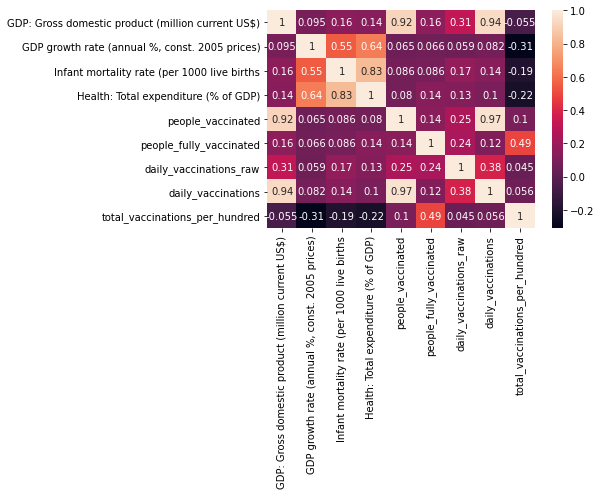

In [22]:
sns.heatmap(df3.corr(), annot= True)

As we can see in the heatmap, only GDP has a big correlation with people vaccinated